---
## Random Forest: Lead Qualification

Data set imported from Salesforce. Includes high quality leads (all data is populated) that have been either qualified or disqualified.


In [1]:
import pandas as pd
import numpy as np

#import the dataset
df = pd.read_csv('./LeadQualification.csv')
print(df.columns)
                              

Index(['Age', 'Height', 'Weight', 'BMI', 'Face Amount', 'Health Status',
       'Smoking Status', 'Status'],
      dtype='object')


### Select Data Set Metrics and Classifier

In [2]:
# Create variables for metrics and classifier so we can use this on different data sets
# Set the data we want to drop as drop_cols

# Set our classifier
classifier = 'Status'

# Set the rest of the fields as attributes
attributes = [column for column in list(df.columns) if column != classifier]
print("Classifier:",classifier)
print("Attributes",attributes)

# Set X and y
X = df[attributes]
y = df[classifier]


Classifier: Status
Attributes ['Age', 'Height', 'Weight', 'BMI', 'Face Amount', 'Health Status', 'Smoking Status']


In [3]:
df.describe()

,Age,Height,Weight,BMI,Face Amount
count,125.000000,125.000000,125.000000,125.000000,125.000000
mean,69.632000,67.488000,187.960000,28.836800,198050.024000
std,7.884791,3.828198,44.789904,5.583808,154237.679316
min,52.000000,60.000000,98.000000,17.750000,10000.000000
25%,63.000000,64.000000,157.000000,25.600000,100000.000000
50%,70.000000,68.000000,180.000000,28.240000,150000.000000
75%,75.000000,70.000000,217.000000,32.480000,250000.000000
max,100.000000,78.000000,329.000000,48.580000,1000000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             125 non-null    float64
 1   Height          125 non-null    float64
 2   Weight          125 non-null    float64
 3   BMI             125 non-null    float64
 4   Face Amount     125 non-null    float64
 5   Health Status   125 non-null    object 
 6   Smoking Status  125 non-null    object 
 7   Status          125 non-null    object 
dtypes: float64(5), object(3)
memory usage: 7.9+ KB


### Category Fields
Let's convert our object fields into the category datatype.

In [5]:
#Convert object fields to category dtype

object_fields = list(df.select_dtypes('object').columns)

for field in object_fields:
    df[field] = df[field].astype('category')
    print(field+': ', df[field].unique()) # print unique values for next step

Health Status:  ['Slightly below average', 'Well below average', 'Average', 'Terminal', 'Above average']
Categories (5, object): ['Above average', 'Average', 'Slightly below average', 'Terminal', 'Well below average']
Smoking Status:  ['NonSmoker', 'Smoker']
Categories (2, object): ['NonSmoker', 'Smoker']
Status:  ['Disqualified', 'Qualified']
Categories (2, object): ['Disqualified', 'Qualified']


In [6]:
# Convert Health and Smoking Status into number values
# Specify the order for  our category fields

health = ['Terminal', 'Well below average', 'Slightly below average', 'Average', 'Above average']
smoke = ['NonSmoker', 'Smoker']
lead_status = ['Disqualified', 'Qualified']

from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder(categories=[health, smoke, lead_status])
ordinal.fit(df[['Health Status','Smoking Status','Status']])
df[['Health Status','Smoking Status','Status']] = ordinal.transform(df[['Health Status','Smoking Status','Status']])
df.head()

,Age,Height,Weight,BMI,Face Amount,Health Status,Smoking Status,Status
0,77.0,78.0,220.0,25.42,200000.0,2.0,0.0,0.0
1,60.0,75.0,325.0,40.62,100000.0,1.0,1.0,0.0
2,59.0,75.0,275.0,34.37,200000.0,1.0,0.0,1.0
3,75.0,75.0,225.0,28.12,100000.0,3.0,0.0,0.0
4,61.0,74.0,220.0,28.24,350000.0,3.0,0.0,0.0


## Split the data into training and test portions

In [7]:
from sklearn.model_selection import train_test_split


X = df[attributes]
y = df[classifier]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8) #training set size = 1-test_size

In [8]:
#show metrics

X_train.head() #first 5 rows

,Age,Height,Weight,BMI,Face Amount,Health Status,Smoking Status
123,81.0,61.0,165.0,31.17,240000.0,3.0,0.0
121,71.0,61.0,115.0,21.73,250000.0,4.0,0.0
66,79.0,67.0,170.0,26.62,100000.0,4.0,0.0
109,75.0,63.0,150.0,26.57,450000.0,3.0,0.0
85,71.0,65.0,158.0,26.29,150000.0,4.0,0.0


In [9]:
#show quality scores

y_train.head() #prints out first 5 rows

123    1.0
121    0.0
66     0.0
109    0.0
85     0.0
Name: Status, dtype: float64

## Training the Model

In [10]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier as rf

#Create a Gaussian Classifier with hyperparameters
clf=rf(n_estimators=100, max_features=7, random_state=6)

#View Current Parameters
print('Parameters:\n')
for param, value in clf.get_params().items():
    print('    ',param,'=',str(value)+',')


#Train the model using the training sets
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

Parameters:

     bootstrap = True,
     ccp_alpha = 0.0,
     class_weight = None,
     criterion = gini,
     max_depth = None,
     max_features = 7,
     max_leaf_nodes = None,
     max_samples = None,
     min_impurity_decrease = 0.0,
     min_samples_leaf = 1,
     min_samples_split = 2,
     min_weight_fraction_leaf = 0.0,
     n_estimators = 100,
     n_jobs = None,
     oob_score = False,
     random_state = 6,
     verbose = 0,
     warm_start = False,


## Evaluate the Model

In [11]:
#Import Scikit-Learn metrics module for accuracy calculation
from sklearn import metrics

#Model Accuracy -- how often is the classifier correct?
print("Accuracy:",str(round(metrics.accuracy_score(y_test, y_pred)*100,2))+'%')

Accuracy: 76.0%


### What Drives the Model's Decision Making Abilities?

In [12]:
#Feature importance with Pandas
#Order by importance
feature_imp = pd.Series(clf.feature_importances_, index=attributes).sort_values(ascending=True)

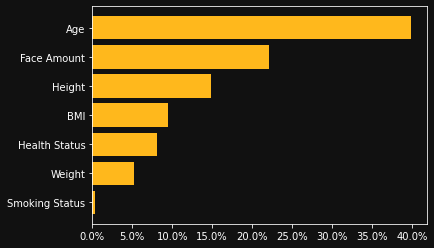

In [13]:
#Plot the data
from matplotlib import pyplot as plt, ticker as mtick

#format the graph
plt.style.use('dark_background')
fig, ax = plt.subplots()
fig.patch.set_facecolor('#111111')
ax.patch.set_facecolor('#111111')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

#plot the data
ax.barh(feature_imp.index, feature_imp.values, color='#ffb81c')
plt.show()


### Let's Test a New Lead: Does Our Model Qualify Them?

In [14]:
# Create a new Lead to test
# Attribute Order: 'Age', 'Height', 'Weight', 'BMI', 'Face Amount', 'Health Status', 'Smoking Status'
test_lead = {
    'Age':90,
    'Height':70,
    'Weight':170,
    'BMI':24.2,
    'Face Amount':500000,
    'Health Status':0,
    'Smoking Status':1
}

lead_df = pd.DataFrame.from_dict([test_lead])

#lead_df[['Health Status', 'Smoking Status']] = ordinal.transform(lead_df[['Health Status', 'Smoking Status']])
predicted_score = clf.predict(lead_df)

print("Prediction:")
print("Lead",lead_status[int(predicted_score)])

Prediction:
Lead Disqualified


In [15]:
# Let's bin our data to view a few histograms

age_bins = [0, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105]
df['Age Bin'] = pd.cut(df['Age'],age_bins)

face_bins = [0, 100000, 500000, 1000000, 1500000, 2000000, 2500000, 3000000]
df['Face Amount Bin'] = pd.cut(df['Face Amount'], face_bins)

height_bins = [0, 45, 50, 55, 60, 65, 70, 75, 80]
df['Height Bin'] = pd.cut(df['Height'], height_bins)

bmi_bins = [0, 10, 15, 20, 25, 30, 35, 40, 45, 50]
df['BMI Bin'] = pd.cut(df['BMI'], bmi_bins)

df.head()

,Age,Height,Weight,BMI,Face Amount,Health Status,Smoking Status,Status,Age Bin,Face Amount Bin,Height Bin,BMI Bin
0,77.0,78.0,220.0,25.42,200000.0,2.0,0.0,0.0,"(75, 80]","(100000, 500000]","(75, 80]","(25, 30]"
1,60.0,75.0,325.0,40.62,100000.0,1.0,1.0,0.0,"(0, 60]","(0, 100000]","(70, 75]","(40, 45]"
2,59.0,75.0,275.0,34.37,200000.0,1.0,0.0,1.0,"(0, 60]","(100000, 500000]","(70, 75]","(30, 35]"
3,75.0,75.0,225.0,28.12,100000.0,3.0,0.0,0.0,"(70, 75]","(0, 100000]","(70, 75]","(25, 30]"
4,61.0,74.0,220.0,28.24,350000.0,3.0,0.0,0.0,"(60, 65]","(100000, 500000]","(70, 75]","(25, 30]"


In [16]:
df['Status'] = df['Status'].replace({0:'Disqualified',1:'Qualified'})
df.head()


,Age,Height,Weight,BMI,Face Amount,Health Status,Smoking Status,Status,Age Bin,Face Amount Bin,Height Bin,BMI Bin
0,77.0,78.0,220.0,25.42,200000.0,2.0,0.0,Disqualified,"(75, 80]","(100000, 500000]","(75, 80]","(25, 30]"
1,60.0,75.0,325.0,40.62,100000.0,1.0,1.0,Disqualified,"(0, 60]","(0, 100000]","(70, 75]","(40, 45]"
2,59.0,75.0,275.0,34.37,200000.0,1.0,0.0,Qualified,"(0, 60]","(100000, 500000]","(70, 75]","(30, 35]"
3,75.0,75.0,225.0,28.12,100000.0,3.0,0.0,Disqualified,"(70, 75]","(0, 100000]","(70, 75]","(25, 30]"
4,61.0,74.0,220.0,28.24,350000.0,3.0,0.0,Disqualified,"(60, 65]","(100000, 500000]","(70, 75]","(25, 30]"


In [20]:
# Let's Look at Qualified Leads

df_qualified = df.query('Status == "Qualified"')
df_qualified.drop('Age')
df_qualified.head()

KeyError: "['Age'] not found in axis"

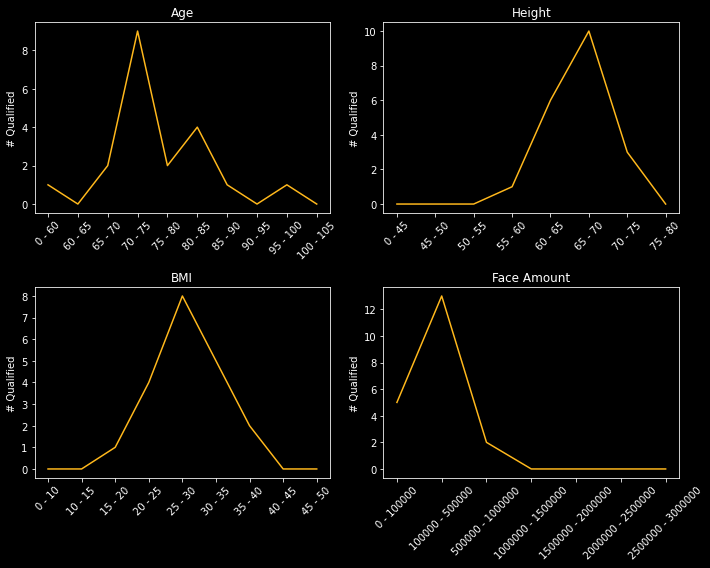

In [18]:
# Bucket Data and Look at Histograms
attributes =['Age', 'Height', 'BMI', 'Face Amount']

plt.figure(figsize=(10,8))

for i in range(len(attributes)):
    var = attributes[i]
    s = df_qualified.groupby([var+' Bin']).count()[var]
    #df_age = df_age.to_frame().reset_index()
    X = [str(item).replace(', ',' - ').replace('(','').replace(']','') for item in s.index]
    y = s.values
    plt.subplot(2, 2, i+1)
    plt.plot(X, y, color='#ffb81c')
    plt.xticks(rotation = 45)
    plt.title(var)
    plt.ylabel('# Qualified')

plt.tight_layout()
plt.show()